In [1]:
import pandas as pd  
import numpy as np  

In [3]:
df = pd.read_excel(r"C:\Users\hp\Downloads\ICRISAT-District Level Data.xlsx")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [7]:
df.columns = df.columns.str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   dist code                                    16146 non-null  int64  
 1   year                                         16146 non-null  int64  
 2   state code                                   16146 non-null  int64  
 3   state name                                   16146 non-null  object 
 4   dist name                                    16146 non-null  object 
 5   rice area (1000 ha)                          16146 non-null  float64
 6   rice production (1000 tons)                  16146 non-null  float64
 7   rice yield (kg per ha)                       16146 non-null  float64
 8   wheat area (1000 ha)                         16146 non-null  float64
 9   wheat production (1000 tons)                 16146 non-null  float64
 10

In [11]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing Values Count:\n", missing_values)

Missing Values Count:
 dist code                               0
year                                    0
state code                              0
state name                              0
dist name                               0
                                       ..
vegetables area (1000 ha)               0
fruits and vegetables area (1000 ha)    0
potatoes area (1000 ha)                 0
onion area (1000 ha)                    0
fodder area (1000 ha)                   0
Length: 80, dtype: int64


In [13]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [17]:
df


,dist code,year,state code,state name,dist name,rice area (1000 ha),rice production (1000 tons),rice yield (kg per ha),wheat area (1000 ha),wheat production (1000 tons),...,sugarcane yield (kg per ha),cotton area (1000 ha),cotton production (1000 tons),cotton yield (kg per ha),fruits area (1000 ha),vegetables area (1000 ha),fruits and vegetables area (1000 ha),potatoes area (1000 ha),onion area (1000 ha),fodder area (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [19]:
df.to_excel("Agri_data.xlsx", index=False)


In [20]:
df.to_excel("AgriData_Explorer.xlsx", sheet_name="AgriData_Explorer", index=False)


In [77]:
import pymysql

# Connect to MySQL Server
conn = pymysql.connect(
    host="localhost",  
    user="root",       
    password="naga",
    database="agridata" 
)

cursor = conn.cursor()

In [79]:
# Create the 'agriinfo' table
cursor.execute("""
    CREATE TABLE agriinfo (
    `dist code` INT,
    `year` INT,
    `state code` INT,
    `state name` VARCHAR(255),
    `dist name` VARCHAR(255),
    `rice area` FLOAT, 
    `rice production` FLOAT,
    `rice yield` FLOAT,
    `wheat area` FLOAT,
    `wheat production` FLOAT,
    `wheat yield` FLOAT,
    `kharif sorghum_area` FLOAT,
    `kharif sorghum_production` FLOAT,
    `kharif sorghum yield` FLOAT,
    `rabi sorghum area` FLOAT,
    `rabi sorghum production` FLOAT,
    `rabi sorghum yield` FLOAT,
    `sorghum area` FLOAT,
    `sorghum production` FLOAT,
    `sorghum yield` FLOAT,
    `pearl millet area` FLOAT,  
    `pearl millet production` FLOAT,
    `pearl millet yield` FLOAT,
    `maize area` FLOAT,
    `maize production` FLOAT,
    `maize yield` FLOAT,
    `finger millet area` FLOAT,
    `finger millet production` FLOAT,
    `finger millet yield` FLOAT,
    `barley area` FLOAT,
    `barley production` FLOAT,
    `barley yield` FLOAT,
    `chickpea area` FLOAT,
    `chickpea production` FLOAT,
    `chickpea yield` FLOAT,
    `pigeonpea area` FLOAT,
    `pigeonpea production` FLOAT,
    `pigeonpea yield` FLOAT,
    `minor pulses area` FLOAT,
    `minor pulses production` FLOAT,
    `minor pulses yield` FLOAT,
    `groundnut area` FLOAT,
    `groundnut production` FLOAT,
    `groundnut yield` FLOAT,
    `sesamum area` FLOAT,
    `sesamum production` FLOAT,
    `sesamum yield` FLOAT,
    `rapeseed mustard area` FLOAT,
    `rapeseed mustard production` FLOAT,
    `rapeseed mustard yield` FLOAT,
    `safflower area` FLOAT,
    `safflower production` FLOAT,
    `safflower yield` FLOAT,
    `castor area` FLOAT,
    `castor production` FLOAT,
    `castor yield` FLOAT,
    `linseed area` FLOAT,
    `linseed production` FLOAT,
    `linseed yield` FLOAT,
    `sunflower area` FLOAT,
    `sunflower production` FLOAT,
    `sunflower yield` FLOAT,
    `soyabean area` FLOAT,
    `soyabean production` FLOAT,
    `soyabean yield` FLOAT,
    `oilseeds area` FLOAT,
    `oilseeds production` FLOAT,
    `oilseeds yield` FLOAT,
    `sugarcane area` FLOAT,
    `sugarcane production` FLOAT,
    `sugarcane yield` FLOAT,
    `cotton area` FLOAT,
    `cotton production` FLOAT,
    `cotton yield` FLOAT,
    `fruits area` FLOAT,
    `vegetables area` FLOAT,
    `fruits and vegetables area` FLOAT,
    `potatoes area` FLOAT,
    `onion area` FLOAT,
    `fodder area` FLOAT
);
""")


0

In [81]:
df


,dist code,year,state code,state name,dist name,rice area (1000 ha),rice production (1000 tons),rice yield (kg per ha),wheat area (1000 ha),wheat production (1000 tons),...,sugarcane yield (kg per ha),cotton area (1000 ha),cotton production (1000 tons),cotton yield (kg per ha),fruits area (1000 ha),vegetables area (1000 ha),fruits and vegetables area (1000 ha),potatoes area (1000 ha),onion area (1000 ha),fodder area (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [83]:
df.rename({"pearl _millet_area":"pearl_millet_area"},axis='columns')


,dist code,year,state code,state name,dist name,rice area (1000 ha),rice production (1000 tons),rice yield (kg per ha),wheat area (1000 ha),wheat production (1000 tons),...,sugarcane yield (kg per ha),cotton area (1000 ha),cotton production (1000 tons),cotton yield (kg per ha),fruits area (1000 ha),vegetables area (1000 ha),fruits and vegetables area (1000 ha),potatoes area (1000 ha),onion area (1000 ha),fodder area (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   dist code                                    16146 non-null  int64  
 1   year                                         16146 non-null  int64  
 2   state code                                   16146 non-null  int64  
 3   state name                                   16146 non-null  object 
 4   dist name                                    16146 non-null  object 
 5   rice area (1000 ha)                          16146 non-null  float64
 6   rice production (1000 tons)                  16146 non-null  float64
 7   rice yield (kg per ha)                       16146 non-null  float64
 8   wheat area (1000 ha)                         16146 non-null  float64
 9   wheat production (1000 tons)                 16146 non-null  float64
 10

In [87]:
df.rename(columns={"pearl _millet_area": "pearl_millet_area "}, inplace=True)


In [89]:
cols = ", ".join(df.columns)  # Column names
colvalues = ", ".join(["%s"] * len(df.columns))  
insert_query = f"INSERT INTO agriinfo VALUES ({colvalues})"

tupledata = [tuple(row) for row in df.itertuples(index=False)]
conn.cursor().executemany(insert_query, tupledata)
conn.commit()

In [49]:
##EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#------1-------------------------------------------------------------------------------------------------
#Top 7 RICE PRODUCTION State Data(Bar_plot)
	#select statename,sum(rice_production) total_production
	#from agriinfo group by statename order by total_production desc limit 7;

In [53]:
sns.set(style="whitegrid")


C:\Users\Muthu\AppData\Local\Temp\ipykernel_16768\3660531861.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="rice production (1000 tons)", x="state name", data=top7, palette="Blues_r")


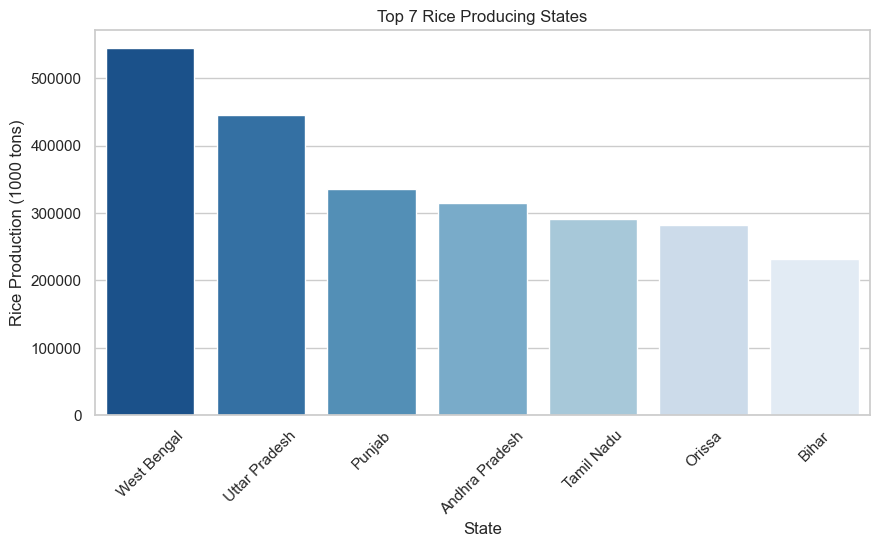

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Group by state name and sum the rice production (1000 tons)
rice_production = df.groupby("state name")["rice production (1000 tons)"].sum().reset_index()

# Get top 7 rice producing states
top7 = rice_production.nlargest(7, "rice production (1000 tons)")

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(y="rice production (1000 tons)", x="state name", data=top7, palette="Blues_r")

# Set labels and title
plt.ylabel("Rice Production (1000 tons)")
plt.xlabel("State")
plt.title("Top 7 Rice Producing States")

# Show the plot
plt.xticks(rotation=45)  # Rotate state names for better readability
plt.show()


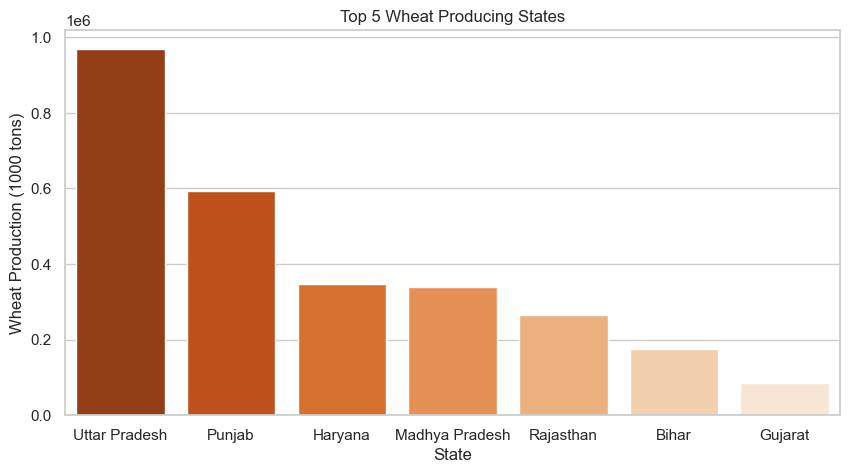

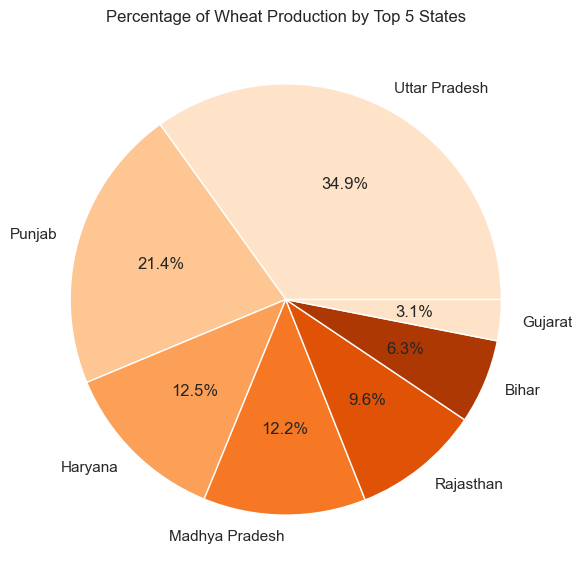

In [67]:
#--------------------2---------------------------------------------------------------------------------------
#Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
	#select statename,sum(wheat_production) totalProduction from agriinfo
	#group by statename order by totalProduction desc limit 5;
wheat_production=df.groupby("state name")["wheat production (1000 tons)"].sum().reset_index()
wtop5=wheat_production.nlargest(7, "wheat production (1000 tons)")

plt.figure(figsize=(10, 5))
sns.barplot(y="wheat production (1000 tons)", x="state name", data=wtop5, hue="state name", legend=False,palette="Oranges_r")
plt.ylabel("Wheat Production (1000 tons)")
plt.xlabel("State")
plt.title("Top 5 Wheat Producing States")
plt.show()

plt.figure(figsize=(7, 7))
plt.pie(wtop5["wheat production (1000 tons)"], labels=wtop5["state name"], autopct='%1.1f%%', colors=sns.color_palette("Oranges"))
plt.title("Percentage of Wheat Production by Top 5 States")
plt.show()

In [69]:
!pip install squarify

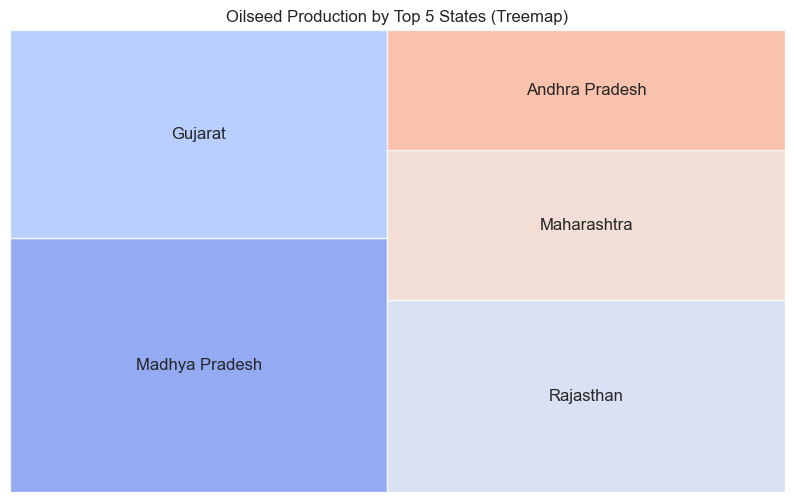

In [75]:
#-------------------------------------------3----------------------------------------------------#
#Oil seed production by top 5 state
	#select statename,sum(oilseeds_production) totalProduction from agriinfo
	#group by statename order by totalProduction desc limit 5;


import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Assuming df is your DataFrame
# Group by state name and sum the oilseeds production (1000 tons)
oilseeds_production = df.groupby("state name")["oilseeds production (1000 tons)"].sum().reset_index()

# Get top 5 oilseeds producing states
otop5 = oilseeds_production.nlargest(5, "oilseeds production (1000 tons)")

# Create the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=otop5["oilseeds production (1000 tons)"], label=otop5["state name"], alpha=0.7, color=sns.color_palette("coolwarm"))

# Set the title and remove axis
plt.title("Oilseed Production by Top 5 States (Treemap)")
plt.axis("off")

# Show the plot
plt.show()


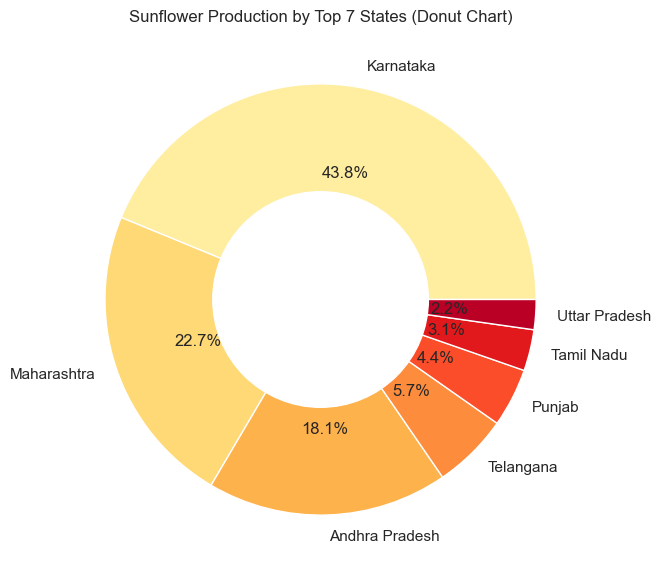

In [77]:
# ---4---------------------------------------------------------------------------------------------------------- 
#Top 7 SUNFLOWER PRODUCTION  State
	#select statename,sum(sunflower_production) totalProduction from agriinfo
	#group by statename order by totalProduction desc limit 7;

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Group by state name and sum sunflower production
sunflower_production = df.groupby("state name")["sunflower production (1000 tons)"].sum().reset_index()

# Get top 7 sunflower-producing states
stop7 = sunflower_production.nlargest(7, "sunflower production (1000 tons)")

# Create the donut chart
plt.figure(figsize=(7, 7))
custom_palette = sns.color_palette("YlOrRd", n_colors=7)  # Adjusted palette to 7 colors
plt.pie(stop7["sunflower production (1000 tons)"], labels=stop7["state name"], autopct='%1.1f%%', colors=custom_palette)

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Sunflower Production by Top 7 States (Donut Chart)")
plt.show()


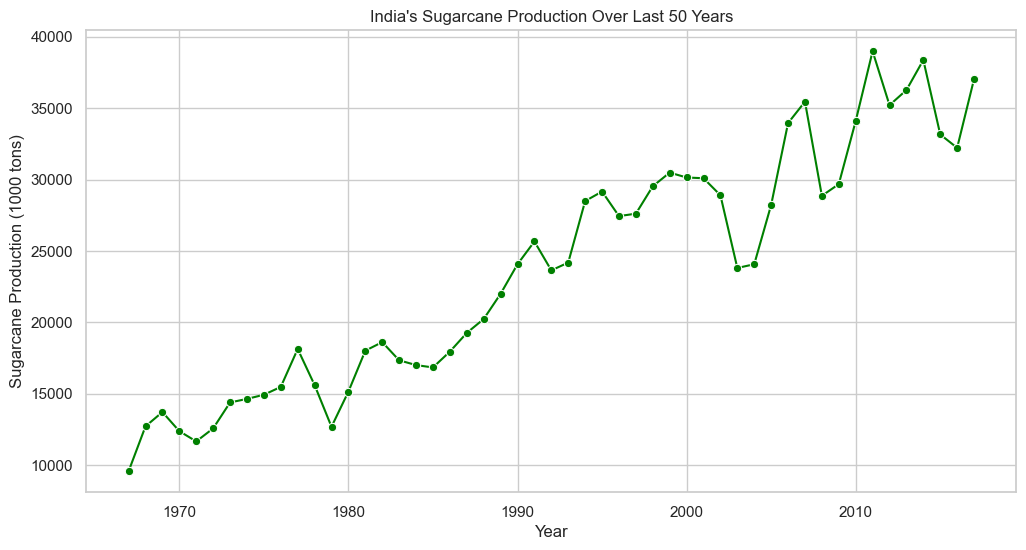

In [79]:

#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
#	select year, SUM(sugarcane_production) AS total_production 
#	FROM AgriInfo GROUP BY year ORDER BY year DESC LIMIT 50 ;
Curryear = df["year"].max()
# Filter data for the last 50 years
# Filter data for the last 50 years
df_sugarcane = df[df["year"] >= (Curryear - 50)]

# Group by year and sum sugarcane production
sugarcane_production = df_sugarcane.groupby("year")["sugarcane production (1000 tons)"].sum().reset_index()

# Plotting the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="sugarcane production (1000 tons)", data=sugarcane_production, marker="o", color="green")

plt.xlabel("Year")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.title("India's Sugarcane Production Over Last 50 Years")
plt.show()


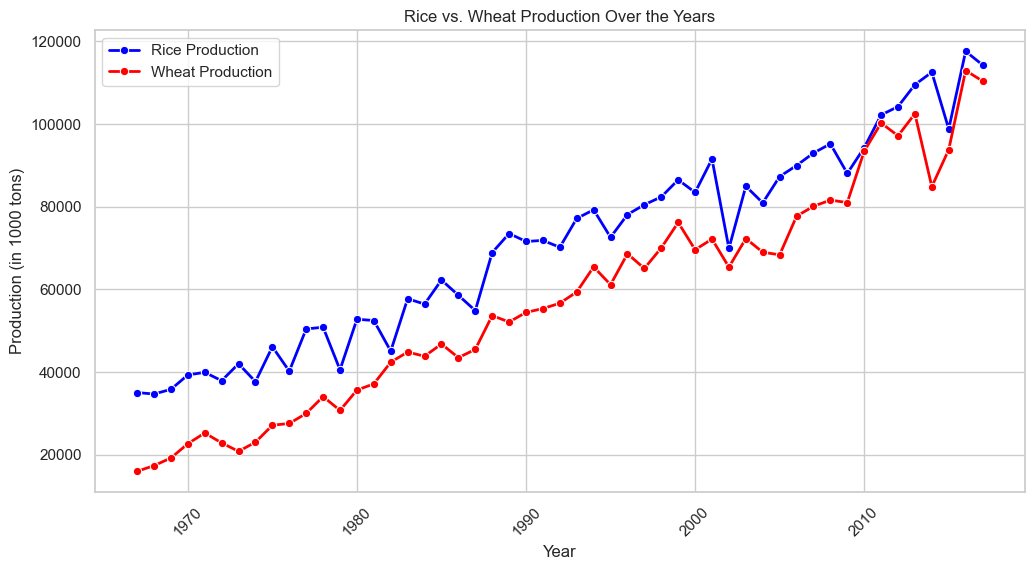

In [83]:
#Rice Production Vs Wheat Production (Last 50y)R

#select year, SUM(rice_production) rice_production, SUM(wheat_production) wheat_production
#FROM AgriInfo GROUP BY year ORDER BY year DESC LIMIT 50;
# Get the current year
Curryear = df["year"].max()

# Filter data for the last 50 years
df_Rice_wheat = df[df["year"] >= (Curryear - 50)]

# Group by year and sum the rice and wheat production
Rice_wheat_production = df_Rice_wheat.groupby("year")[["rice production (1000 tons)", "wheat production (1000 tons)"]].sum().reset_index()

# Plotting the line plots for both rice and wheat production
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="rice production (1000 tons)", data=Rice_wheat_production, marker="o", color="blue", linewidth=2, label="Rice Production")
sns.lineplot(x="year", y="wheat production (1000 tons)", data=Rice_wheat_production, marker="o", color="red", linewidth=2, label="Wheat Production")

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Production (in 1000 tons)")
plt.title("Rice vs. Wheat Production Over the Years")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\Muthu\AppData\Local\Temp\ipykernel_16768\3144993019.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rice production (1000 tons)", y="dist name", data=wb_rice_top, palette="Blues_r")


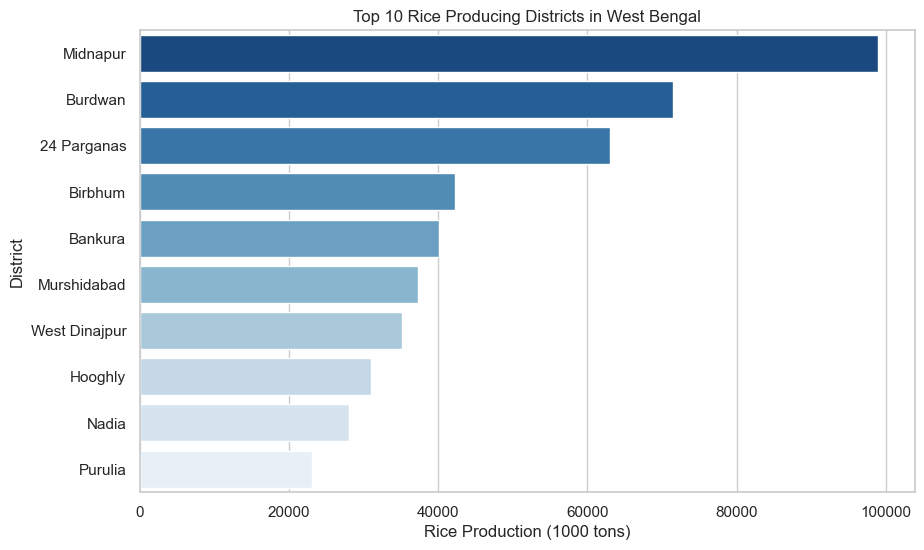

In [91]:
# 6--------------------------------
#Rice Production By West Bengal Districts

	#select district_name, SUM(rice_production) AS total_production 
	#FROM AgriInfo WHERE statename= 'West Bengal' GROUP BY district_name ORDER BY total_production DESC


import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for West Bengal and group by district
wb_rice = df[df["state name"] == "West Bengal"].groupby("dist name")["rice production (1000 tons)"].sum().reset_index()

# Optionally limit the number of districts to the top N
top_n = 10  # You can change this number
wb_rice_top = wb_rice.nlargest(top_n, "rice production (1000 tons)")

# Create a horizontal bar plot to avoid cluttering
plt.figure(figsize=(10, 6))
sns.barplot(x="rice production (1000 tons)", y="dist name", data=wb_rice_top, palette="Blues_r")

# Customize the plot
plt.xlabel("Rice Production (1000 tons)")
plt.ylabel("District")
plt.title(f"Top {top_n} Rice Producing Districts in West Bengal")

# Show the plot
plt.show()


C:\Users\Muthu\AppData\Local\Temp\ipykernel_16768\249038471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="wheat production (1000 tons)", data=up_wheat_top10, palette="Oranges_r")


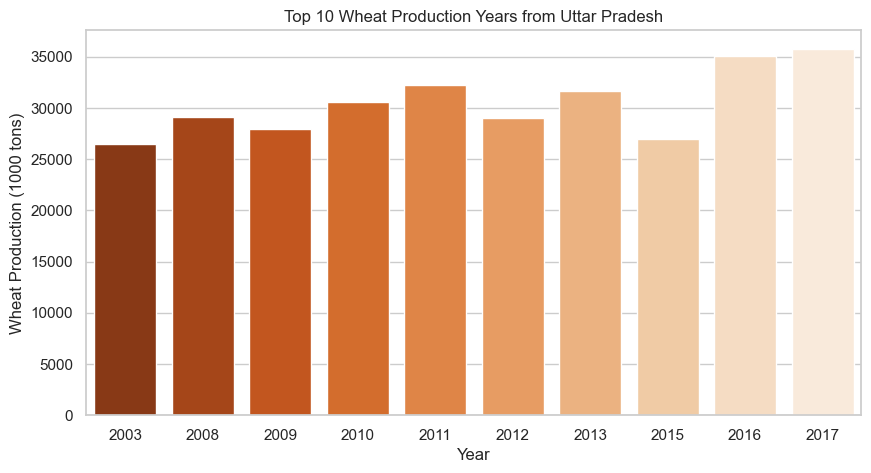

In [93]:
#Top 10 Wheat Production Years From UP
	#select year, SUM(wheat_production) AS total_production 
	#FROM AgriInfo WHERE statename= 'Uttar Pradesh' GROUP BY year ORDER BY total_production DESC limit 10;
# Filter the data for Uttar Pradesh and group by year
up_wheat = df[df["state name"] == "Uttar Pradesh"].groupby("year")["wheat production (1000 tons)"].sum().reset_index()

# Get the top 10 years with the highest wheat production
up_wheat_top10 = up_wheat.nlargest(10, "wheat production (1000 tons)")

# Create a barplot to visualize the top 10 years for wheat production
plt.figure(figsize=(10, 5))
sns.barplot(x="year", y="wheat production (1000 tons)", data=up_wheat_top10, palette="Oranges_r")

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 tons)")
plt.title("Top 10 Wheat Production Years from Uttar Pradesh")

# Show the plot
plt.show()


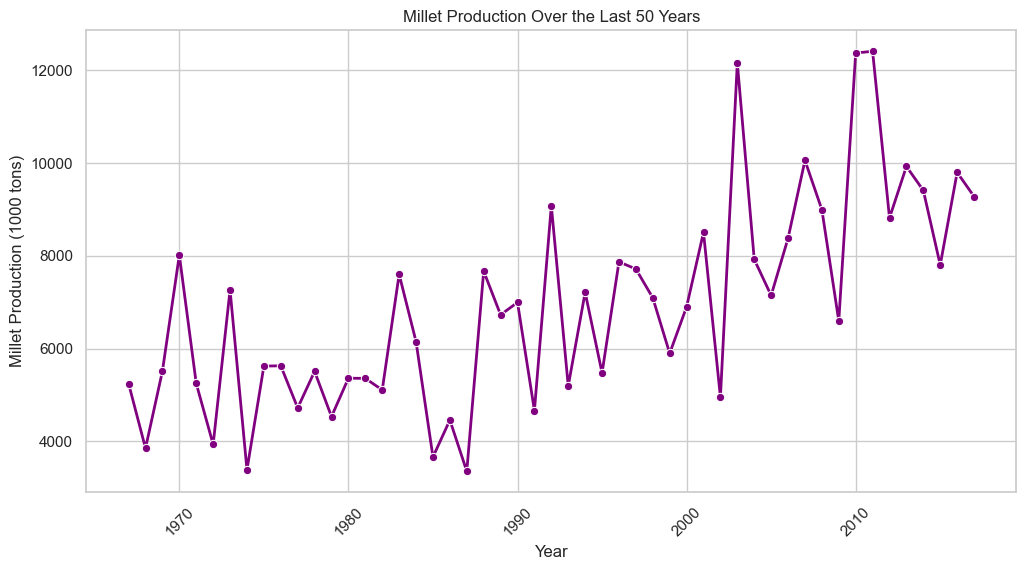

In [95]:
#Millet Production (Last 50y)

	#select year,SUM(pearl_millet_production) AS total_production 
	#FROM AgriInfo  group by year ORDER BY total_production DESC limit 50;
# Get the current year
Curryear = df["year"].max()

# Filter the data for the last 50 years
df_millet = df[df["year"] >= (Curryear - 50)]

# Group by year and sum the millet production
millet_50y = df_millet.groupby("year")["pearl millet production (1000 tons)"].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="pearl millet production (1000 tons)", data=millet_50y, marker="o", color="purple", linewidth=2)

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Millet Production (1000 tons)")
plt.title("Millet Production Over the Last 50 Years")
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()


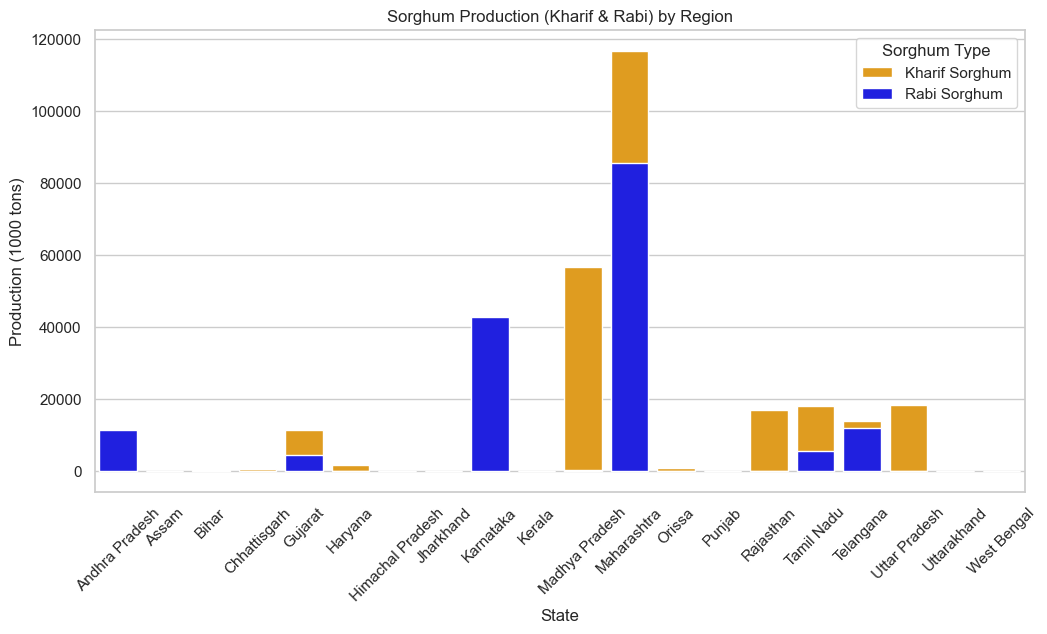

In [97]:
#Sorghum Production (Kharif and Rabi) by Region
	#select statename,sum(kharif_sorghum_production) Kharif,sum(rabisorghum_production) Rabi from agriinfo
	#group by statename order by statename
# Group data by state and sum sorghum production for Kharif and Rabi
sorghum_data = df.groupby("state name")[["kharif sorghum production (1000 tons)", "rabi sorghum production (1000 tons)"]].sum().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(12, 6))

# Plot Kharif sorghum production
sns.barplot(x="state name", y="kharif sorghum production (1000 tons)", data=sorghum_data, color="orange", label="Kharif Sorghum")

# Plot Rabi sorghum production
sns.barplot(x="state name", y="rabi sorghum production (1000 tons)", data=sorghum_data, color="blue", label="Rabi Sorghum")

# Customize the plot
plt.xlabel("State")
plt.ylabel("Production (1000 tons)")
plt.title("Sorghum Production (Kharif & Rabi) by Region")
plt.xticks(rotation=45)
plt.legend(title="Sorghum Type")
plt.show()


C:\Users\Muthu\AppData\Local\Temp\ipykernel_16768\3135753300.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="groundnut production (1000 tons)", y="state name", data=gtop7, palette="YlOrBr")


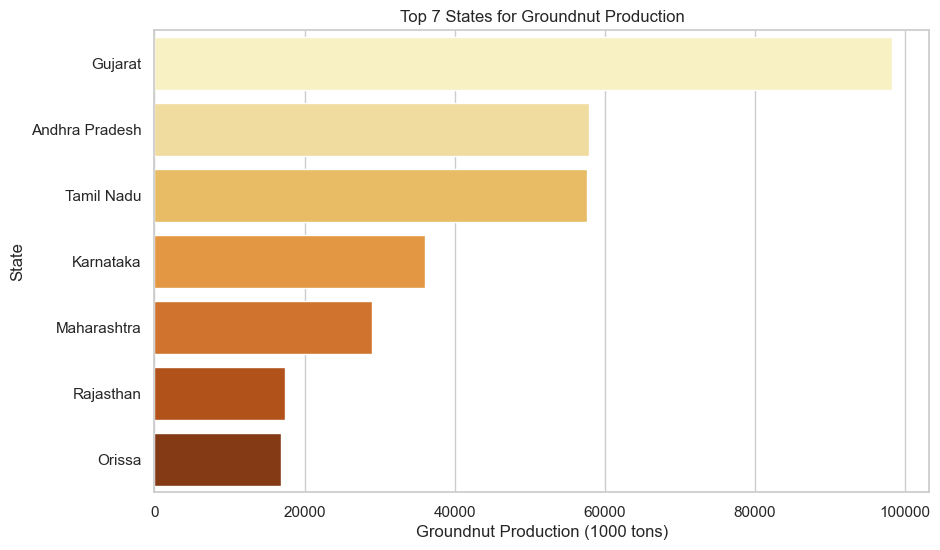

In [105]:
# Top 7 States for Groundnut Production
	#select statename,sum(groundnut_production) Total_Production from agriinfo
	#group by statename order by Total_Production desc limit 7;

gtop7 = df.groupby("state name")["groundnut production (1000 tons)"].sum().nlargest(7).reset_index()

# Plot Horizontal Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="groundnut production (1000 tons)", y="state name", data=gtop7, palette="YlOrBr")

# Customize the plot
plt.xlabel("Groundnut Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 7 States for Groundnut Production")
plt.show()



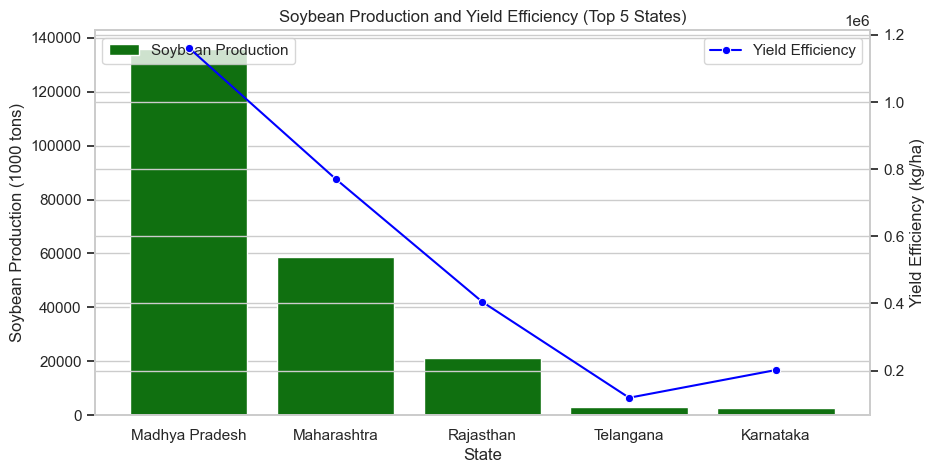

In [113]:
#Soybean Production by Top 5 States and Yield Efficiency
	#select statename,sum(soyabean_production) Total_Production,avg(soyabean_yield) Average_yield from agriinfo
	#group by statename order by Total_Production desc limit 5;
# Grouping data and selecting top 5 states by soybean production
soybean_top5 = df.groupby("state name")[["soyabean production (1000 tons)", "soyabean yield (kg per ha)"]].sum().nlargest(5, "soyabean production (1000 tons)").reset_index()

# Create a figure with two axes for the bar and line plots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for soybean production
sns.barplot(x="state name", y="soyabean production (1000 tons)", data=soybean_top5, ax=ax1, color="green", label="Soybean Production")
ax1.set_xlabel("State")
ax1.set_ylabel("Soybean Production (1000 tons)")

# Create a second y-axis for the line plot (yield efficiency)
ax2 = ax1.twinx()
sns.lineplot(x="state name", y="soyabean yield (kg per ha)", data=soybean_top5, marker="o", color="blue", ax=ax2, label="Yield Efficiency")

# Set the labels for the second y-axis
ax2.set_ylabel("Yield Efficiency (kg/ha)")

# Title and Legends
plt.title("Soybean Production and Yield Efficiency (Top 5 States)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Display the plot
plt.show()


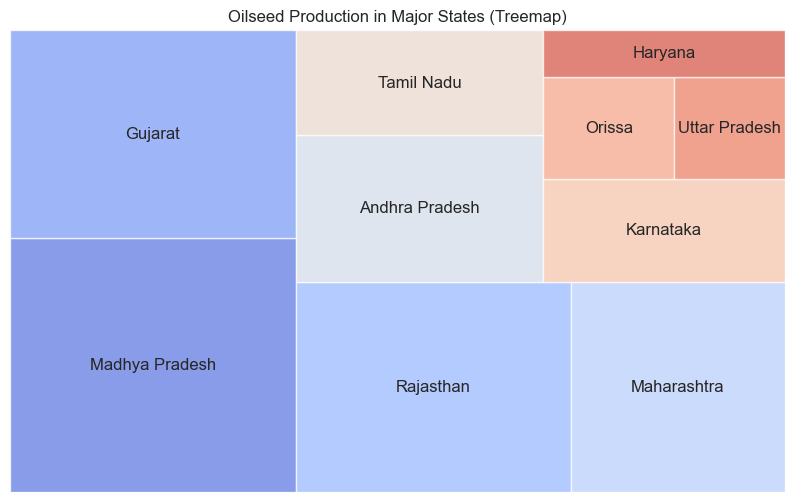

In [115]:
#Oilseed Production in Major States

	#select statename,sum(oilseeds_production) Total_Production from agriinfo
	#group by statename order by Total_Production desc ;
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Grouping data to get top 10 states by oilseed production
oilseed_major = df.groupby("state name")["oilseeds production (1000 tons)"].sum().nlargest(10).reset_index()

# Treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=oilseed_major["oilseeds production (1000 tons)"], 
              label=oilseed_major["state name"], 
              alpha=0.7, 
              color=sns.color_palette("coolwarm", len(oilseed_major)))

plt.title("Oilseed Production in Major States (Treemap)")
plt.axis("off")
plt.show()

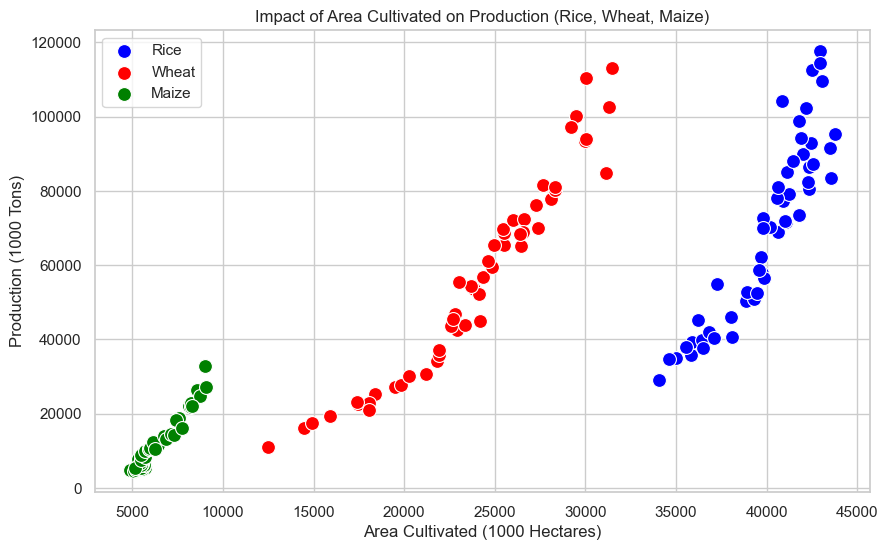

In [117]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
	#select year,sum(rice_area) ,sum(rice_production),
    #sum(wheat_area) ,sum(wheat_production),sum(maize_area),sum(maize_production) 
    #from Agriinfo group by year order by year ;
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by year and summing the relevant columns
df_grouped = df.groupby("year")[["rice area (1000 ha)", "rice production (1000 tons)", 
                                 "wheat area (1000 ha)", "wheat production (1000 tons)", 
                                 "maize area (1000 ha)", "maize production (1000 tons)"]].sum().reset_index()

# Creating the scatter plot
plt.figure(figsize=(10, 6))

# Plotting the scatter for Rice, Wheat, and Maize
sns.scatterplot(x=df_grouped["rice area (1000 ha)"], y=df_grouped["rice production (1000 tons)"], label="Rice", color="blue", s=100)
sns.scatterplot(x=df_grouped["wheat area (1000 ha)"], y=df_grouped["wheat production (1000 tons)"], label="Wheat", color="red", s=100)
sns.scatterplot(x=df_grouped["maize area (1000 ha)"], y=df_grouped["maize production (1000 tons)"], label="Maize", color="green", s=100)

# Adding labels and title
plt.xlabel("Area Cultivated (1000 Hectares)")
plt.ylabel("Production (1000 Tons)")
plt.title("Impact of Area Cultivated on Production (Rice, Wheat, Maize)")

# Adding the legend
plt.legend()

# Displaying the plot
plt.show()


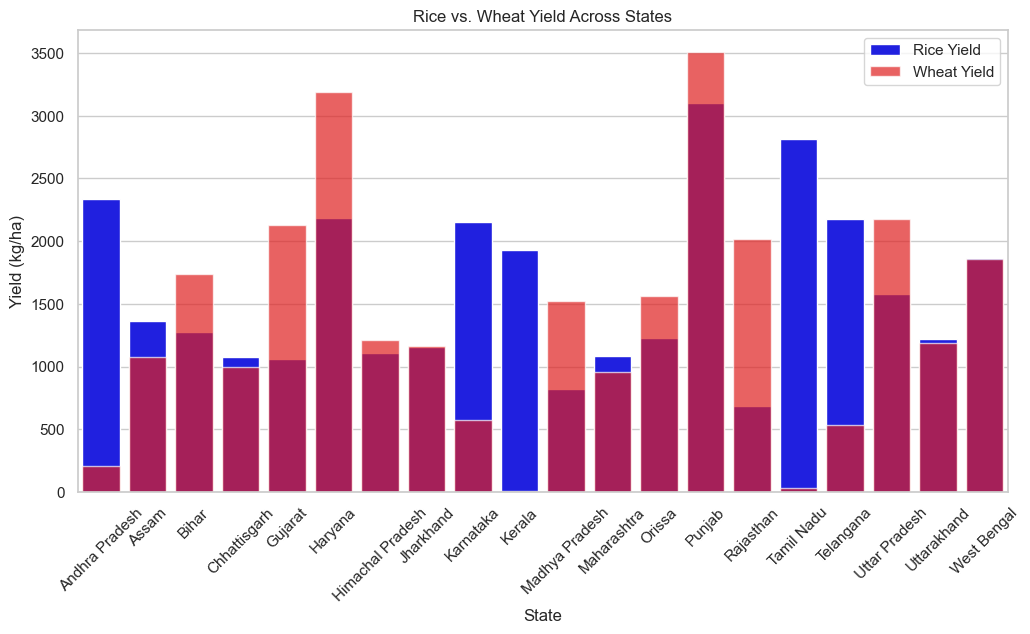

In [125]:
#Rice vs. Wheat Yield Across States

#select statename,avg(rice_yield) ,avg(wheat_yield) 
#from Agriinfo group by statename order by statename ;

yield_comparison = df.groupby("state name")[["rice yield (kg per ha)", "wheat yield (kg per ha)"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="state name", y="rice yield (kg per ha)", data=yield_comparison, color="blue", label="Rice Yield")
sns.barplot(x="state name", y="wheat yield (kg per ha)", data=yield_comparison, color="red", alpha=0.7, label="Wheat Yield")

plt.xlabel("State")
plt.ylabel("Yield (kg/ha)")
plt.title("Rice vs. Wheat Yield Across States")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Displaying the plot
plt.show()
